## Aprendizaje Automático
Ejercicios Tema 3

# Ejercicio 1: Separación lineal en 2D
Se tienen los siguientes puntos en el plano:

• Clase +1: (2,2), (4,4), (4,0)

• Clase –1: (0,0), (0,3), (1,4)

1. Representa los puntos en un plano cartesiano.
2. Encuentra un hiperplano separador lineal que maximice el margen. Escribe la ecuación de la recta separadora en la forma: 𝑤1𝑥1 + 𝑤2𝑥2 + 𝑏 = 0
3. Identifica los vectores soporte.
4. Verifica si tu solución cumple las condiciones:

$$
𝑦i(𝑤 ⋅ 𝑥i + 𝑏) ≥ 1
$$

1. Representa los puntos en un plano cartesiano.
Datos (índice, coordenadas, etiqueta y_i):
   0: x = [2 2],  y = 1
   1: x = [4 4],  y = 1
   2: x = [4 0],  y = 1
   3: x = [0 0],  y = -1
   4: x = [0 3],  y = -1
   5: x = [1 4],  y = -1



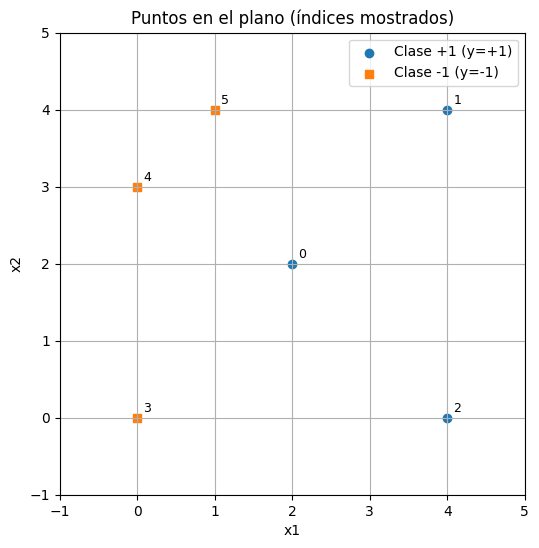

2. Encuentra un hiperplano separador lineal que maximice el margen. Escribe la ecuación de la recta separadora en la forma: 𝑤1𝑥1 + 𝑤2𝑥2 + 𝑏 = 0
  w = [ 1.3331 -0.3331]
  b = -1.000233
  Recta: 1.333100 x1 + -0.333100 x2 + -1.000233 = 0

3. Identifica los vectores soporte
  índice 3: [0. 0.], etiqueta y = -1
  índice 5: [1. 4.], etiqueta y = -1
  índice 0: [2. 2.], etiqueta y = 1

4. Verifica si tu solución cumple las condiciones
  Punto 0: x=[2 2], y=1, f=0.999767, y*f=0.999767, cumple? False
  Punto 1: x=[4 4], y=1, f=2.999767, y*f=2.999767, cumple? True
  Punto 2: x=[4 0], y=1, f=4.332167, y*f=4.332167, cumple? True
  Punto 3: x=[0 0], y=-1, f=-1.000233, y*f=1.000233, cumple? True
  Punto 4: x=[0 3], y=-1, f=-1.999533, y*f=1.999533, cumple? True
  Punto 5: x=[1 4], y=-1, f=-0.999533, y*f=0.999533, cumple? False
¿Todas cumplen? -> False



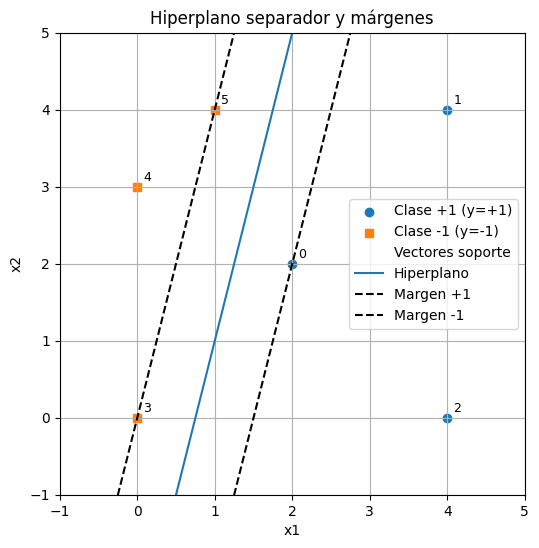

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# -----------------------------
# Datos: puntos y etiquetas
# -----------------------------

X = np.array([
    [2, 2], [4, 4], [4, 0],   # Clase +1
    [0, 0], [0, 3], [1, 4]    # Clase -1
])
y = np.array([1, 1, 1, -1, -1, -1])

print("1. Representa los puntos en un plano cartesiano.\nDatos (índice, coordenadas, etiqueta y_i):")
for i, (xi, yi) in enumerate(zip(X, y)):
    print(f"  {i:>2}: x = {xi},  y = {yi}")
print("")

# -----------------------------
# Paso 1: Representación gráfica
# -----------------------------

plt.figure(figsize=(6,6))
plt.scatter(X[y==1][:,0], X[y==1][:,1], marker='o', label='Clase +1 (y=+1)')
plt.scatter(X[y==-1][:,0], X[y==-1][:,1], marker='s', label='Clase -1 (y=-1)')

for i, xi in enumerate(X):
    plt.text(xi[0]+0.08, xi[1]+0.08, str(i), fontsize=9)

plt.xlim(-1,5)
plt.ylim(-1,5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Puntos en el plano (índices mostrados)")
plt.grid(True)
plt.legend()
plt.show()

# -----------------------------
# Paso 2: Entrenamiento SVM lineal
# -----------------------------

clf = SVC(kernel='linear', C=1e6)
clf.fit(X, y)

w = clf.coef_[0]
b = clf.intercept_[0]
print("2. Encuentra un hiperplano separador lineal que maximice el margen. Escribe la ecuación de la recta separadora en la forma: 𝑤1𝑥1 + 𝑤2𝑥2 + 𝑏 = 0")
print(f"  w = {w}")
print(f"  b = {b:.6f}")
print(f"  Recta: {w[0]:.6f} x1 + {w[1]:.6f} x2 + {b:.6f} = 0\n")

# -----------------------------
# Paso 3: Vectores soporte
# -----------------------------

support_idx = clf.support_
support_vecs = clf.support_vectors_
print("3. Identifica los vectores soporte")
for idx, sv in zip(support_idx, support_vecs):
    print(f"  índice {idx}: {sv}, etiqueta y = {y[idx]}")
print("")

# -----------------------------
# Paso 4: Verificación de condiciones
# -----------------------------

f_vals = X.dot(w) + b
margins = y * f_vals
print("4. Verifica si tu solución cumple las condiciones")
for i, (xi, yi, fi, mi) in enumerate(zip(X, y, f_vals, margins)):
    print(f"  Punto {i}: x={xi}, y={yi}, f={fi:.6f}, y*f={mi:.6f}, cumple? {mi >= 1-1e-9}")
print("¿Todas cumplen? ->", np.all(margins >= 1-1e-9))
print("")

# -----------------------------
# Gráfica final: hiperplano y márgenes
# -----------------------------

plt.figure(figsize=(6,6))
plt.scatter(X[y==1][:,0], X[y==1][:,1], marker='o', label='Clase +1 (y=+1)')
plt.scatter(X[y==-1][:,0], X[y==-1][:,1], marker='s', label='Clase -1 (y=-1)')
plt.scatter(support_vecs[:,0], support_vecs[:,1], s=220, marker='o',
            facecolors='none', linewidths=2, label='Vectores soporte')

xx = np.linspace(-1, 5, 200)
if abs(w[1]) > 1e-12:
    yy = -(w[0]*xx + b)/w[1]
    yy_up = -(w[0]*xx + b - 1)/w[1]
    yy_down = -(w[0]*xx + b + 1)/w[1]
    plt.plot(xx, yy, label='Hiperplano')
    plt.plot(xx, yy_up, 'k--', label='Margen +1')
    plt.plot(xx, yy_down, 'k--', label='Margen -1')
else:
    x_vert = -b/w[0]
    plt.axvline(x=x_vert, label="Hiperplano")

for i, xi in enumerate(X):
    plt.text(xi[0]+0.08, xi[1]+0.08, str(i), fontsize=9)

plt.xlim(-1,5)
plt.ylim(-1,5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Hiperplano separador y márgenes")
plt.grid(True)
plt.legend()
plt.show()


# Ejercicio 2: Clasificación no lineal (XOR)
Considera los siguientes puntos:

• Clase +1: (0,0), (1,1)

• Clase –1: (0,1), (1,0)

1. Demuestra que no existe un hiperplano lineal que los separe.
2. Propón una transformación del espacio o (ejemplo: 𝜙(𝑥) = (𝑥1, 𝑥2, 𝑥1𝑥2)).
3. Explica cómo un kernel podría resolver el problema.

1. Demuestra que no existe un hiperplano lineal que los separe.


C:\Users\kjba2\AppData\Local\Temp\ipykernel_28064\1629716330.py:30: RuntimeWarning: invalid value encountered in scalar divide
  plt.axvline(x=-clf.intercept_[0]/clf.coef_[0][0], color='r', label='Hiperplano lineal')


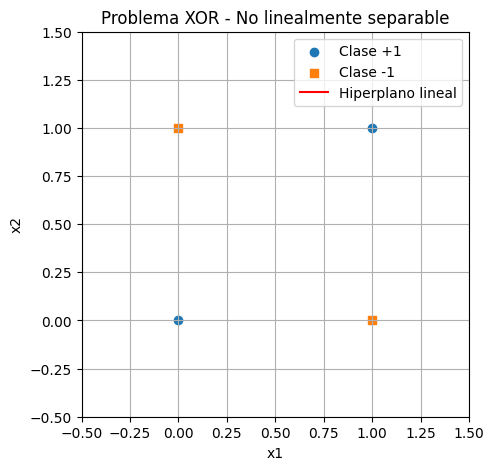

2. Propón una transformación del espacio o (ejemplo: 𝜙(𝑥) = (𝑥1, 𝑥2, 𝑥1𝑥2)).
Datos transformados (x1, x2, x1*x2):
x = [0 0 0], y = 1
x = [1 1 1], y = 1
x = [0 1 0], y = -1
x = [1 0 0], y = -1

Coeficientes del hiperplano en el espacio transformado:
w = [0. 0. 1.]
b = -0.5

3. Explica cómo un kernel podría resolver el problema.


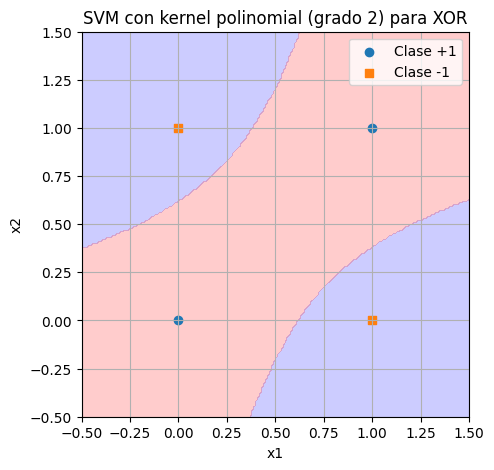

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

print("1. Demuestra que no existe un hiperplano lineal que los separe.")
# Datos XOR
X = np.array([
    [0, 0],
    [1, 1],
    [0, 1],
    [1, 0]
])
y = np.array([1, 1, -1, -1])

# Intento de clasificador lineal
clf = SVC(kernel='linear')
clf.fit(X, y)

# Graficar los puntos
plt.figure(figsize=(5,5))
plt.scatter(X[y==1][:,0], X[y==1][:,1], marker='o', label='Clase +1')
plt.scatter(X[y==-1][:,0], X[y==-1][:,1], marker='s', label='Clase -1')

# Intentar graficar el hiperplano (no separará bien)
xx = np.linspace(-0.5, 1.5, 200)
if abs(clf.coef_[0][1]) > 1e-12:
    yy = -(clf.coef_[0][0]*xx + clf.intercept_[0])/clf.coef_[0][1]
    plt.plot(xx, yy, 'r-', label='Hiperplano lineal')
else:
    plt.axvline(x=-clf.intercept_[0]/clf.coef_[0][0], color='r', label='Hiperplano lineal')

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Problema XOR - No linealmente separable")
plt.grid(True)
plt.legend()
plt.show()

print("2. Propón una transformación del espacio o (ejemplo: 𝜙(𝑥) = (𝑥1, 𝑥2, 𝑥1𝑥2)).")
# Transformación del espacio
X_phi = np.column_stack((X, X[:,0]*X[:,1]))

print("Datos transformados (x1, x2, x1*x2):")
for xi, yi in zip(X_phi, y):
    print(f"x = {xi}, y = {yi}")

# Ahora entrenamos un SVM lineal en el espacio transformado
clf_phi = SVC(kernel='linear')
clf_phi.fit(X_phi, y)

print("\nCoeficientes del hiperplano en el espacio transformado:")
print("w =", clf_phi.coef_[0])
print("b =", clf_phi.intercept_[0])


print("\n3. Explica cómo un kernel podría resolver el problema.")
# SVM con kernel polinomial de grado 2
clf_kernel = SVC(kernel='poly', degree=2, coef0=1)
clf_kernel.fit(X, y)

# Graficar decisión en el espacio original
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 200), np.linspace(-0.5, 1.5, 200))
Z = clf_kernel.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(5,5))
plt.contourf(xx, yy, Z, alpha=0.2, levels=[-1, 0, 1], colors=['blue','red'])
plt.scatter(X[y==1][:,0], X[y==1][:,1], marker='o', label='Clase +1')
plt.scatter(X[y==-1][:,0], X[y==-1][:,1], marker='s', label='Clase -1')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("SVM con kernel polinomial (grado 2) para XOR")
plt.grid(True)
plt.legend()
plt.show()
